In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import matplotlib.patches as mpatches

In [2]:
%matplotlib ipympl

In [2]:
# FitzHugh - Nahumo nerve transmission model
a = 2
b = 1
c = 0.77
I= 1.4
def fhn_volt(values: list, params):
    return values[0] * (params[0] - values[0]) * (values[0] - 1) - values[1] + params[3]

def fhn_var(values: list, params):
    return params[1] * values[0] - params[2] * values[1]

def nullc_volt(x):
    return x * (a - x) * (x - 1) + electric_current

def nullc_var(x):
    return b * x / c

def fhn_volt_no_params(values: list):
    return values[0] * (a - values[0]) * (values[0] - 1) - values[1] + I

def fhn_var_no_params(values: list):
    return b * values[0] - c * values[1]

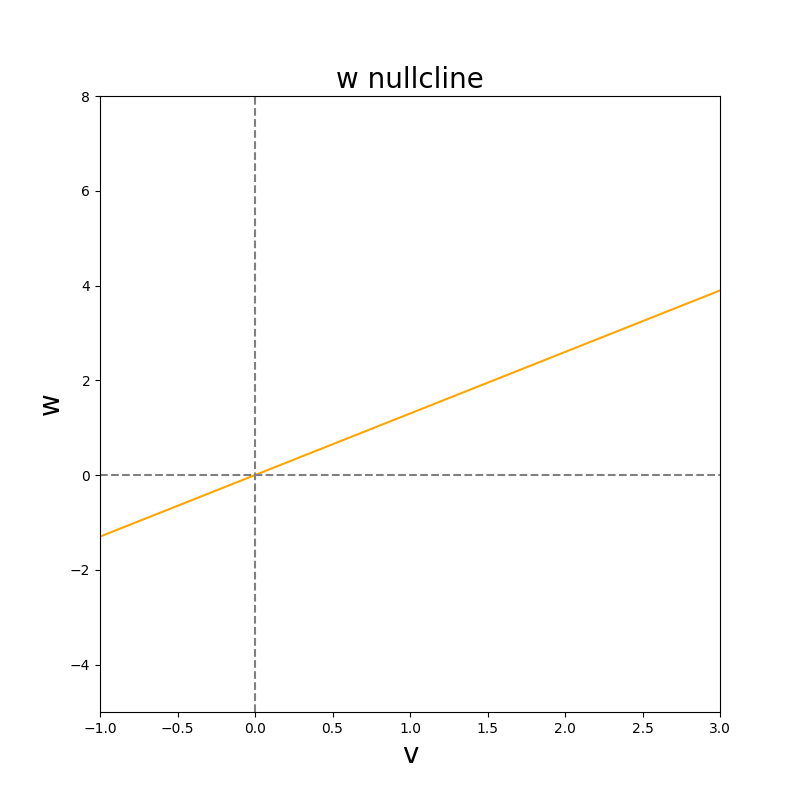

In [4]:
xs = np.linspace(-1,3,100)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#ax.plot(xs, [nullc_volt(x) for x in xs])
ax.plot(xs, [nullc_var(x) for x in xs], c='orange')
ax.set_xlim(-1, 3)
ax.set_ylim(-5, 8)
ax.set_title('w nullcline', fontsize=20)
ax.set_xlabel('v', fontsize=20)
ax.set_ylabel('w', fontsize=20)
ax.axhline(0, c='grey', linestyle='--')
ax.axvline(0, c='grey', linestyle='--')
#fig.savefig("C:\\Users\\Andrzej Socha\\Desktop\\wnullc a.png", bbox_inches='tight')

Phase plane evolution of a system

In [6]:
def plot_diff_system_phase(functions: list, ICs: list, samples: int, show_interval_start, show_interval_end,
                           nullclines = None, restrict_x = None, restrict_y = None, null_samples = None, x = False, labels = None):
    step = show_interval_end / samples
    if len(functions) != len(ICs):
        raise Exception("Input size mismatch")
    results = np.zeros((samples, len(ICs)))    #results for all the functions every time step
    results[0] = ICs
    for time in range(1, samples):
        #print(results[time -1])
        current = results[time - 1]
        for i in range(len(ICs)):
            current_d = functions[i](current)
            results[time, i] = current[i] + current_d * step
    plt.figure(figsize=(8, 7))
    if nullclines != None:
        if not x:
            null_y = np.linspace(restrict_y[0], restrict_y[1], null_samples)
            null_x_1 = [nullclines[0](y) for y in null_y] 
            null_x_2 = [nullclines[1](y) for y in null_y]
            plt.plot(null_x_1, null_y, c="r")
            plt.plot(null_x_2, null_y, c="g")
        else:
            null_x = np.linspace(restrict_x[0], restrict_x[1], null_samples)
            null_y_1 = [nullclines[0](x) for x in null_x] 
            null_y_2 = [nullclines[1](x) for x in null_x]
            plt.plot(null_x, null_y_1, c="r")
            plt.plot(null_x, null_y_2, c="g")
    time_start = int(show_interval_start / step)
    plt.plot(results[time_start :][:, 0], results[time_start :][:, 1])
    if restrict_x != None:
        plt.xlim(restrict_x)
    if restrict_y != None:
        plt.ylim(restrict_y)
    if labels != None:
        plt.xlabel(labels[0], fontsize=20)
        plt.ylabel(labels[1], fontsize=20)
    plt.title("Limit cycle", fontsize=20)
    #plt.savefig("C:\\Users\\Andrzej Socha\\Desktop\\Project\\fhn hopf 1.svg", bbox_inches="tight")
    plt.show

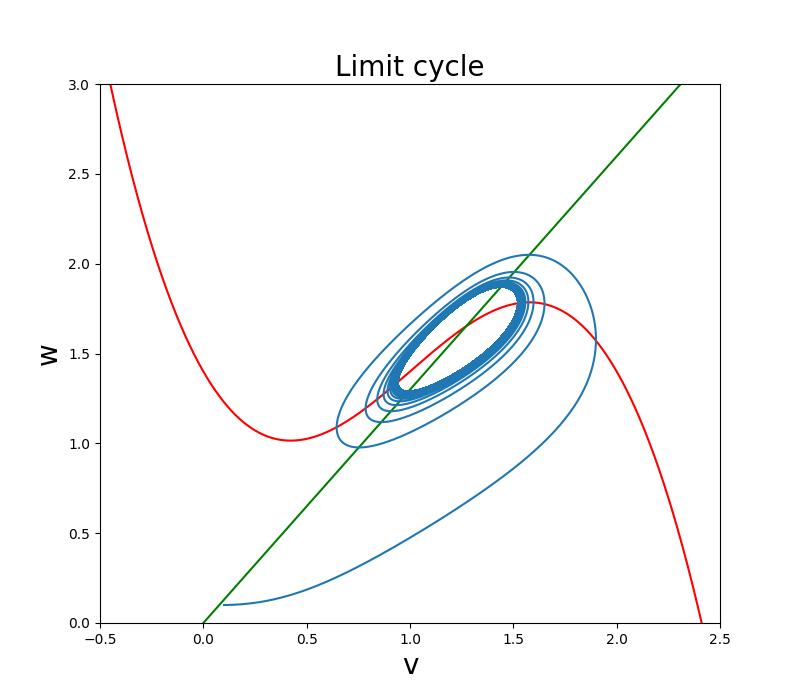

In [7]:
a = 2
b = 1
c = 0.77
electric_current = 1.4
plot_diff_system_phase([fhn_volt_no_params, fhn_var_no_params], [0.1, 0.1], 100000, 0, 2000, [nullc_volt, nullc_var], restrict_x = [-0.5, 2.5], restrict_y = [0, 3], null_samples = 10000, x = True, labels = ["v", "w"])

Gradient fields

In [8]:
def plot_field(grad_functions, x_min, x_max, x_resolution, y_min, y_max, y_resolution, params = None, null_x = None, null_y = None):
    xs, ys = np.linspace(x_min, x_max, x_resolution), np.linspace(y_min, y_max, y_resolution)
    if params == None:
        u = np.array([[grad_functions[0]([x, y]) for x in xs] for y in ys])
        v = np.array([[grad_functions[1]([x, y]) for x in xs] for y in ys])
    else:
        u = np.array([[grad_functions[0]([x, y], params) for x in xs] for y in ys])
        v = np.array([[grad_functions[1]([x, y], params) for x in xs] for y in ys])
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(111)
    ax.quiver(xs, ys, u, v, norm = 'log')
    if null_x != None:
        for curve in null_x:
            ax.plot(xs, curve(xs, params))
    if null_y != None:
        for curve in null_y:
            ax.plot(curve(ys, params), ys)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

In [9]:
def fhn_nullc_v_x(x, params):
    return params[3] + x * (params[0] - x) * (x - 1)

def fhn_nullc_w_x(x, params):
    return x * params[1] / params[2]

def fhn_weird_volt(values, params):
    return values[0] - values[0] ** 3 / 3 - values[1] + params[3]

def fhn_weird_var(values, params):
    return 0.08 * (values[0] + 0.7 - values[1] * 0.8)
    

def fhn_weird_nullc_v_x(x, params):
    return x - x**3 / 3 + params[3]

def fhn_weird_nullc_w_x(x, params):
    return (x + 0.7) / 0.8

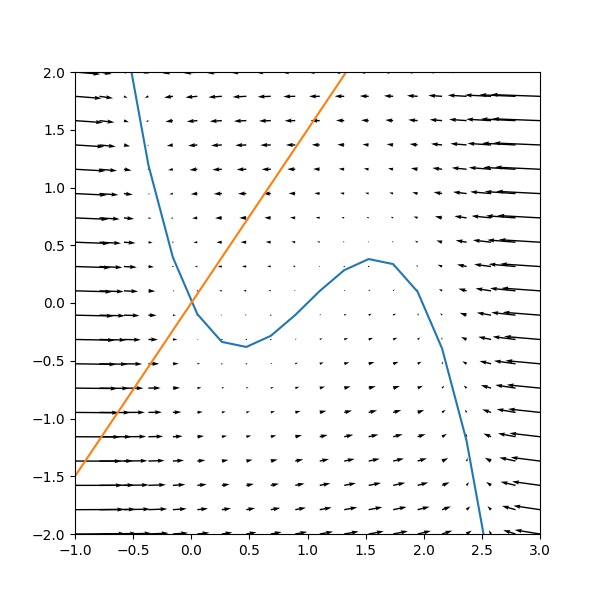

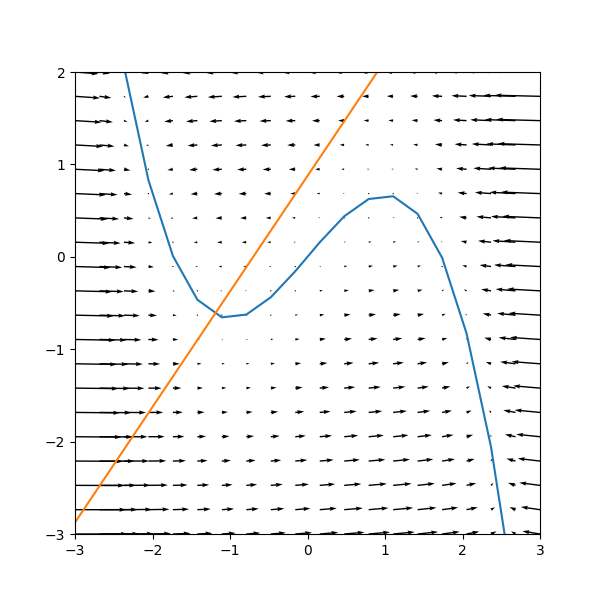

In [10]:
plot_field([fhn_volt, fhn_var], -1, 3, 20, -2, 2, 20, params = [2, 0.15, 0.1, 0], null_x = [fhn_nullc_v_x, fhn_nullc_w_x])
plot_field([fhn_weird_volt, fhn_weird_var], -3, 3, 20, -3, 2, 20, params = [2.1, 1.5, 1, 0], null_x = [fhn_weird_nullc_v_x, fhn_weird_nullc_w_x])

Plotting the system with time varyig parameters - canard visualisation

In [19]:
#function takes a list of variables and a list of parameters as input
def plot_varying_param(functions: list, ICs: list,  parameters_function, time_end, samples, index_to_plot: int):  
    step = time_end / samples
    results = np.zeros((samples, len(functions)))    #results for all the functions every time step
    results[0] = ICs
    for time in range(1, samples):
        current = results[time - 1]
        for i in range(len(functions)):
            current_d = functions[i](current, parameters_function(time * step))
            results[time, i] = current[i] + current_d * step
    plt.figure(figsize=(15, 5))
    times = np.linspace(0, time_end, samples)
    plt.plot(times, results[:, index_to_plot])
    plt.show()

In [20]:
#Fitz-Hugh-Nahumo time dependent parameter option

def fhn_volt_1(values: list, parameters: list):
    return values[0] * (parameters[0] - values[0]) * (values[0] - 1) - values[1] + parameters[3]

def fhn_var_1(values: list, parameters: list):
    return parameters[1] * values[0] - parameters[2] * values[1]

def fhn_parameters(time):
    a = 3
    b = 2
    c = 2
    electric_current = 1 * int(time < 0.2 or 0.4 <= time < 0.6 or time >= 0.8) + 2 * int(0.2 <= time < 0.4) -0.1 * int(0.6 <= time < 0.8)
    return [a, b, c, electric_current]

In [21]:
def plot_phase_varying_param(functions: list, ICs: list, params_function, samples: int, show_interval_start, show_interval_end, params = None,
                           nullclines = None, restrict_x = None, restrict_y = None, null_samples = None, x = True, labels = None, title = None,
                            save_path = None, size = (8, 8)):
    step = show_interval_end / samples
    if type(ICs[0]) != list:
        ICs = [ICs]
    if len(functions) != len(ICs[0]):
        raise Exception("Input size mismatch")
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111)
    time_start = int(show_interval_start / step)
    
    uno = mpatches.Patch(label = "Trajectories along the canard", color = 'blue')
    dos = mpatches.Patch(label = "v nullcline", color = "red")
    tres = mpatches.Patch(label = "w nullcline", color = "green")
    
    for ic in ICs:
        results = np.zeros((samples, len(ICs[0])))    #results for all the functions every time step
        results[0] = ic
        for time in range(1, samples):
            current = results[time - 1]
            for i in range(len(ICs[0])):
                current_d = functions[i](current, params_function(time * step))
                results[time, i] = current[i] + current_d * step
        ax.plot(deepcopy(results[time_start :][:, 0]), deepcopy(results[time_start :][:, 1]), c = 'blue', label = "trajectory")
    if params == None:
        params = params_function(0)
    if nullclines != None:
        if not x:
            null_y = np.linspace(restrict_y[0], restrict_y[1], null_samples)
            null_x_1 = [nullclines[0](y, params) for y in null_y] 
            null_x_2 = [nullclines[1](y, params) for y in null_y]
            ax.plot(null_x_1, null_y, c="r")
            ax.plot(null_x_2, null_y, c="g")
        else:
            null_x = np.linspace(restrict_x[0], restrict_x[1], null_samples)
            null_y_1 = [nullclines[0](x, params) for x in null_x] 
            null_y_2 = [nullclines[1](x, params) for x in null_x]
            null_y_1_1 = [nullclines[0](x, params_function(10)) for x in null_x] 
            null_y_2_2 = [nullclines[1](x, params_function(10)) for x in null_x]
            ax.plot(null_x, null_y_1, c="r", label = "v nullcline")
            ax.plot(null_x, null_y_2, c="g", label = "w nullcline")
            ax.plot(null_x, null_y_1_1, c="r", linestyle = '--', label = "depolarised v nullcline")
            ax.plot(null_x, null_y_2_2, c="g", linestyle = '--')
    if restrict_x != None:
        ax.set_xlim(restrict_x)
    if restrict_y != None:
        ax.set_ylim(restrict_y)
    if labels != None:
        ax.set_xlabel(labels[0], fontsize = 20)
        ax.set_ylabel(labels[1], fontsize = 20)
    if title != None:
        ax.set_title(title, fontsize = 20)
    ax.legend(handles = [uno, dos, tres], fontsize = 18)
    if save_path != None:
        print(save_path)
        plt.savefig(save_path, bbox_inches='tight')
    fig.show

In [22]:
def fhn_pulse(time):
    a = 2
    b = 0.2
    c = 0.1
    I = -1 if 0 < time < 20 else 0.5
    return [a, b, c, I]

In [23]:
def fhn_params(_):
    return [2, 0.04, 0.02, 0.5]

In [24]:
def fhn_anode_params(t):
    a = 2
    b = 0.04
    c = 0.02
    I = 0.5 #if  0< t < 100 else 0.5
    return [a, b, c, I]

In [28]:
inits = [[i, fhn_nullc_w_x(i, fhn_params(0))] for i in np.linspace(0.0114241795, 0.011424181, 20)]

In [26]:
initial_value = 0.0114241799
inits = [initial_value, fhn_nullc_w_x(initial_value, fhn_params(0))]

PATH.svg


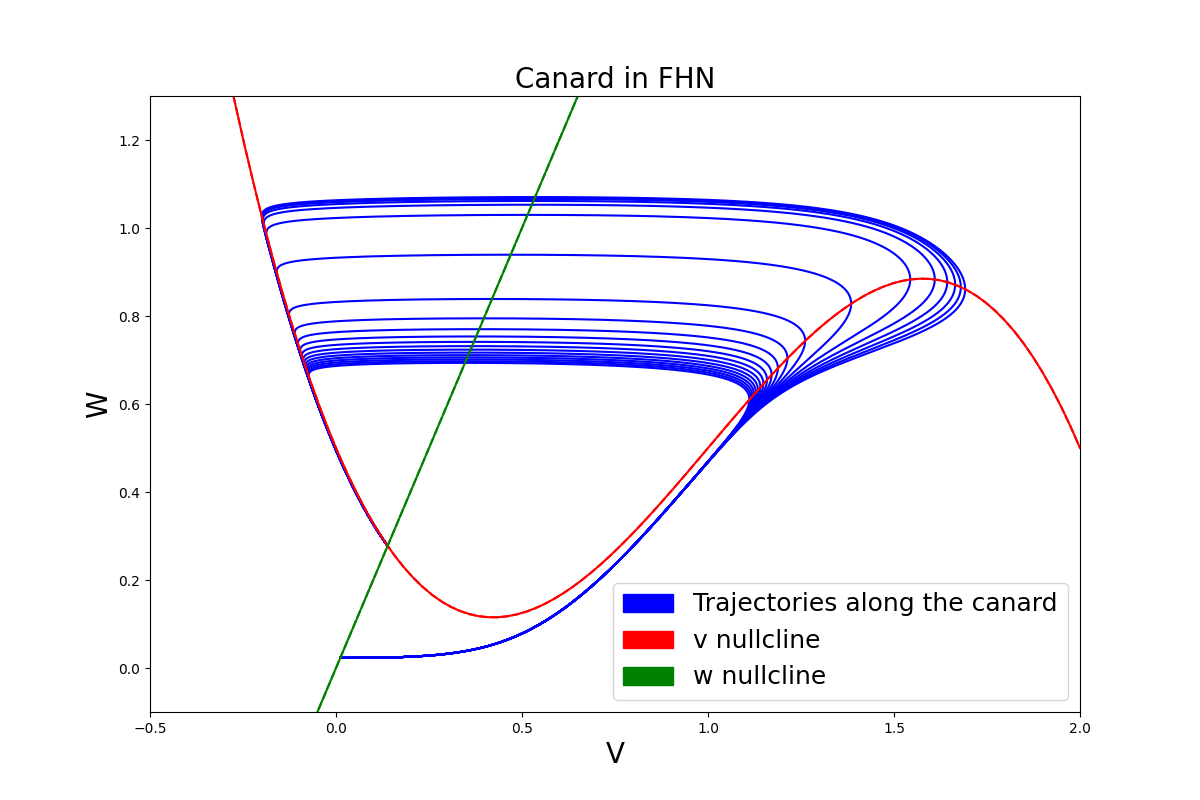

In [29]:
plot_phase_varying_param([fhn_volt, fhn_var], inits, fhn_anode_params, 50000, 0, 500, nullclines = [fhn_nullc_v_x, fhn_nullc_w_x],
                         restrict_x = (-0.5, 2), restrict_y = (-0.1, 1.3), null_samples = 100, labels = ['V', 'W'], title = "Canard in FHN",
                         save_path = "PATH.svg",
                         size = (12, 8))

DIFFUSIVE SYSTEM GRAPH

In [84]:
#FHN system
def fhn_funs():
    return [lambda v, w, t : v - ((v**3)/3) - w - 50*int(t < 1), lambda v, w, t : 0.005 * (4 * v - 2 * w + 3)]

#alternative forulation of the FHN system
def fhn_funs_proper():
    return [lambda v, w, t : v*(v-3)*(1-v) - w + 3*int(t < 0.7) + 0.1, lambda v, w, t : 0.005 * (2 * v - 2 * w)]

In [85]:
def calc_diffusion_line(arr):
    l = len(arr)
    out = [0 for i in range(l)]
    for i in range(1, l-1):
        out[i] = arr[i+1] + arr[i-1] - (2 * arr[i])
    out[0] = arr[1] - arr[0]
    out[-1] = arr[-2] - arr[-1]
    return np.array(out)

def calc_diffusion_ring(arr):
    l = len(arr)
    out = [0 for i in range(l)]
    for i in range(l-1):
        out[i] = arr[i+1] + arr[i-1] - (2 * arr[i])
    out[-1] = arr[-2] - 2 * arr[-1] + arr[0]
    return np.array(out)

def plot_diffusion_sys(funs, ICs, time, steps, x_len = 100, ring = False, save_2d = None, save_3d = None): #ICs : [[vs], [ws]]
    #dv/dt = dv/dxx + f(v, w)
    #dw/dt = g(v, w)
    
    delta = time / steps
    diff_delta = x_len / len(ICs[0])
    out = ICs
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection = '3d')
    fig2d = plt.figure(figsize=(8, 8))
    ax2d = fig2d.add_subplot(111)
    ax2d.set_xlabel('x')
    out = np.array(out)
    plot_samples = 100
    mod = int(steps / plot_samples)
    ys = [k for k in range(len(out[0]))]
    totals = [out[0]]
    
    for t in range(steps):
        #print(out[0])
        if not ring:
            difs_v = calc_diffusion_line(out[0])
            difs_w = calc_diffusion_line(out[1])
        else:
            difs_v = calc_diffusion_ring(out[0])
            difs_w = calc_diffusion_ring(out[1])
        v, w = np.zeros_like(difs_v), np.zeros_like(difs_w)
        #print(max(difs_v))
        #print(f'{t = }--------------------------------')
        #print(difs[1])
        #print(f'last v[1] = {out[t][0][1]}')
        diff_coeff_v = 1e-3
        diff_coeff_w = 1e-3
        for i, dif in enumerate(difs_v):
            if i == 0:
                v[i] = out[0][i] + dif * diff_coeff_v + (funs()[0](out[0][i], out[1][i], t/steps)) * delta
            else:
                v[i] = out[0][i] + dif * diff_coeff_v + (funs()[0](out[0][i], out[1][i], 10)) * delta
            w[i] = out[1][i] + difs_w[i] * diff_coeff_w + (funs()[1](out[0][i], out[1][i], 0)) * delta
        
        out = np.array([deepcopy(v), deepcopy(w)])
        if t % 500 == 0:
            totals.append(out[0])
            ax.plot(ys, out[0], zs = t, zdir = 'y')
        if t % 10000 == 0:
            ax2d.plot(out[0], label = f'time = {t * delta}')
            '''
            if t < 100000:
                ax2d.text(0, out[0][0], f't={t*delta}')
            '''
    #ax2d.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    if save_2d != None:
        fig2d.savefig(save_2d + ".svg", bbox_inches = 'tight')
    if save_3d != None:
        fig3d.savefig(save_3d + ".svg", bbox_inches = 'tight')
    plt.show()
    
    
    totals = np.array(totals)
    return totals

In [90]:
ICs_w = np.zeros((50))
#ICs_w.fill(1.762)
ICs_v = np.zeros((50))
#ICs_v.fill(1.762)

In [87]:
ICs_v_rand = (np.random.rand(100)-0.5) / 10 - 1.08
ICs_w_rand = (np.random.rand(100)-0.5) / 10 - 0.66

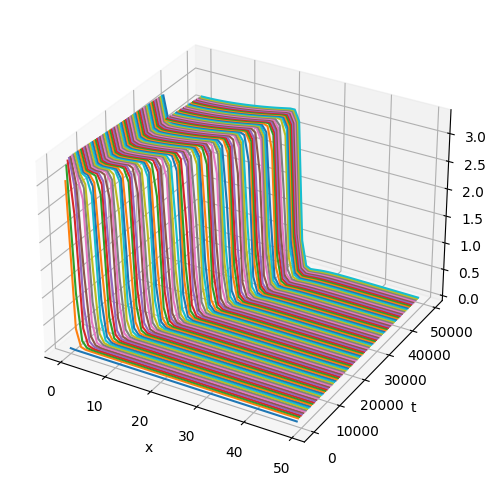

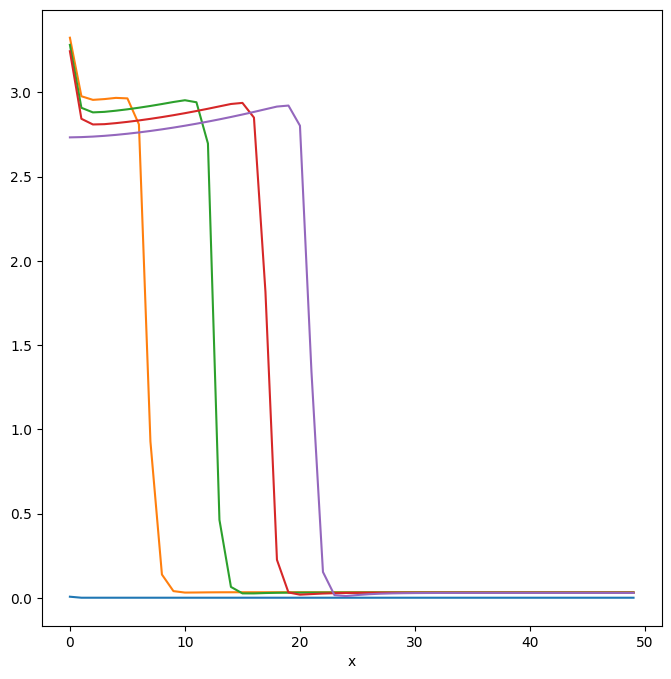

In [91]:
time = 100
output = plot_diffusion_sys(fhn_funs_proper, [ICs_v, ICs_w], time, 500 * time, ring = False)

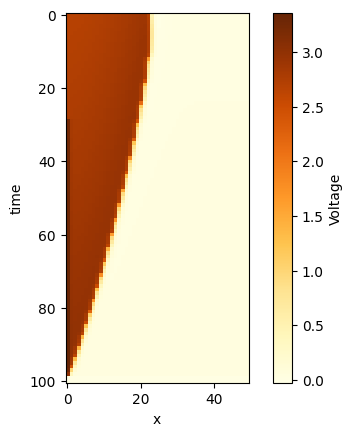

In [92]:
plt.imshow(output[::-1], cmap = 'YlOrBr')
plt.ylabel('time')
plt.xlabel('x')
cbar = plt.colorbar()
cbar.set_label('Voltage')
#plt.savefig("PATH.svg")
plt.show()